In [199]:
import pandas as pd
import numpy as np

In [200]:
df = pd.read_csv('sample.csv')

In [201]:
df.columns = ['방송', '식당', '방영일', '포스팅일', '제목']
df.head()

,방송,식당,방영일,포스팅일,제목
0,수요미식회,서대문양꼬치,20170322,2017. 4. 12. 0:00,[연남동 / 서대문양꼬치] 수요미식회 양고기전골 맛집
1,수요미식회,서대문양꼬치,20170322,2017. 4. 21. 16:17,[마포구 연남동 맛집] 수요미식회 중식로드 맛집 중국 느낌 충만 서대문양꼬치!
2,수요미식회,서대문양꼬치,20170322,2017. 4. 17. 14:44\n\t,요즘 먹은것들 (3)가로수길카페/와인/연남 서대문양꼬치/홍대 아오이토리/스벅/삼성역...
3,수요미식회,서대문양꼬치,20170322,2017. 3. 18. 12:39,연남동 맛집 서대문 양꼬치 - 수요미식회 중식로드
4,수요미식회,서대문양꼬치,20170322,2017. 4. 17. 0:59\n\t,연남동 서대문양꼬치


In [202]:
from datetime import date

b_date = []

for data in df['방영일']:
    year = str(data)[:4]
    month = str(data)[4:6]
    day = str(data)[6:8]
    single_date = date(int(year), int(month), int(day))
    b_date.append(single_date)
    
df['방영일'] = pd.Series(b_date)
df.head(3)

,방송,식당,방영일,포스팅일,제목
0,수요미식회,서대문양꼬치,2017-03-22,2017. 4. 12. 0:00,[연남동 / 서대문양꼬치] 수요미식회 양고기전골 맛집
1,수요미식회,서대문양꼬치,2017-03-22,2017. 4. 21. 16:17,[마포구 연남동 맛집] 수요미식회 중식로드 맛집 중국 느낌 충만 서대문양꼬치!
2,수요미식회,서대문양꼬치,2017-03-22,2017. 4. 17. 14:44\n\t,요즘 먹은것들 (3)가로수길카페/와인/연남 서대문양꼬치/홍대 아오이토리/스벅/삼성역...


In [203]:
p_date = []

for data in df['포스팅일']:
    date_components = data.split('.')
    year = date_components[0]
    month = date_components[1]
    day = date_components[2]
    single_date = date(int(year), int(month), int(day))
    p_date.append(single_date)
    
df['포스팅일'] = pd.Series(p_date)
df.head(3)

,방송,식당,방영일,포스팅일,제목
0,수요미식회,서대문양꼬치,2017-03-22,2017-04-12,[연남동 / 서대문양꼬치] 수요미식회 양고기전골 맛집
1,수요미식회,서대문양꼬치,2017-03-22,2017-04-21,[마포구 연남동 맛집] 수요미식회 중식로드 맛집 중국 느낌 충만 서대문양꼬치!
2,수요미식회,서대문양꼬치,2017-03-22,2017-04-17,요즘 먹은것들 (3)가로수길카페/와인/연남 서대문양꼬치/홍대 아오이토리/스벅/삼성역...


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 5 columns):
방송      335 non-null object
식당      335 non-null object
방영일     335 non-null object
포스팅일    335 non-null object
제목      335 non-null object
dtypes: object(5)
memory usage: 13.2+ KB


In [205]:
df['days_diff'] = df['방영일'] - df['포스팅일']
df['days_diff'] = df['days_diff']
df['days_diff'] = df['days_diff'].astype(str).str.findall(r'(\-?\d+)\s')

In [206]:
list_days = df['days_diff']

days_temp = []
for days in df['days_diff']:
    days_temp.append(days[0])
    
df['days_diff'] = pd.Series(days_temp)

In [207]:
df

,방송,식당,방영일,포스팅일,제목,days_diff
0,수요미식회,서대문양꼬치,2017-03-22,2017-04-12,[연남동 / 서대문양꼬치] 수요미식회 양고기전골 맛집,-21
1,수요미식회,서대문양꼬치,2017-03-22,2017-04-21,[마포구 연남동 맛집] 수요미식회 중식로드 맛집 중국 느낌 충만 서대문양꼬치!,-30
2,수요미식회,서대문양꼬치,2017-03-22,2017-04-17,요즘 먹은것들 (3)가로수길카페/와인/연남 서대문양꼬치/홍대 아오이토리/스벅/삼성역...,-26
3,수요미식회,서대문양꼬치,2017-03-22,2017-03-18,연남동 맛집 서대문 양꼬치 - 수요미식회 중식로드,4
4,수요미식회,서대문양꼬치,2017-03-22,2017-04-17,연남동 서대문양꼬치,-26
5,수요미식회,서대문양꼬치,2017-03-22,2017-03-22,수요미식회 연남동 - 서대문양꼬치 : 양고기전골 넘나 맛있는 것,0
6,수요미식회,서대문양꼬치,2017-03-22,2017-03-22,"수요미식회 연남동 서대문양꼬치 - 사천식 양고기 전골, 돼지고기 가지요리",0
7,수요미식회,서대문양꼬치,2017-03-22,2017-02-20,연남동 맛집/서대문양꼬치,30
8,수요미식회,서대문양꼬치,2017-03-22,2017-04-01,연남동 수요미식회나온 서대문양꼬치,-10
9,수요미식회,서대문양꼬치,2017-03-22,2017-04-06,[홍대/연남동] 서대문 양꼬치,-15


In [208]:
df_group = df.groupby(['식당', 'days_diff']).count()
df_group.head(3)
df_group.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 151 entries, (나노하나, -1) to (서대문양꼬치, 8)
Data columns (total 4 columns):
방송      151 non-null int64
방영일     151 non-null int64
포스팅일    151 non-null int64
제목      151 non-null int64
dtypes: int64(4)
memory usage: 5.7+ KB


In [209]:
df_group.head()

방송  방영일  포스팅일  제목
식당   days_diff                   
나노하나 -1          9    9     9   9
     -10         1    1     1   1
     -11         3    3     3   3
     -12         3    3     3   3
     -14         4    4     4   4

In [210]:
df_group.tail()

방송  방영일  포스팅일  제목
식당     days_diff                   
서대문양꼬치 24          1    1     1   1
       30          2    2     2   2
       4           2    2     2   2
       6           1    1     1   1
       8           1    1     1   1

In [211]:
df_group= df_group.reset_index()
df_group.head(3)
df_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
식당           151 non-null object
days_diff    151 non-null object
방송           151 non-null int64
방영일          151 non-null int64
포스팅일         151 non-null int64
제목           151 non-null int64
dtypes: int64(4), object(2)
memory usage: 7.2+ KB


C:\Users\jeeyun\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\jeeyun\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


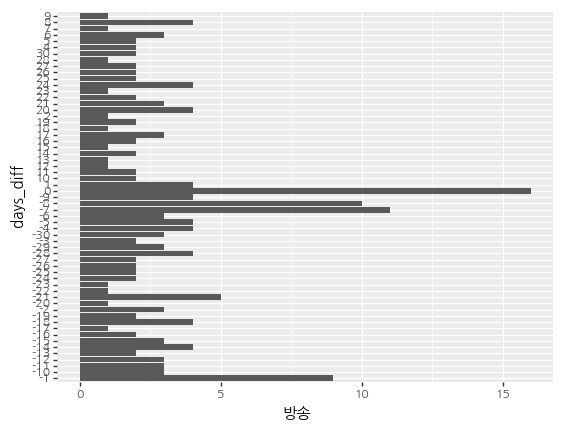

<ggplot: (3416944255)>

In [212]:
from plotnine import *

(ggplot(df_group)
 + aes(x='days_diff', y='방송')
 + coord_flip()
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='NanumGothic'))
)